In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
dogs = pd.read_csv('dogs.csv')
dogs

,breed,height,weight
0,Border Collie,20,45
1,Boston Terrier,16,20
2,Brittany Spaniel,18,35
3,Bullmastiff,27,120
4,Chihuahua,8,8
5,German Shepherd,25,78
6,Golden Retriever,23,70
7,Great Dane,32,160
8,Portuguese Water Dog,21,50
9,Standard Poodle,19,65


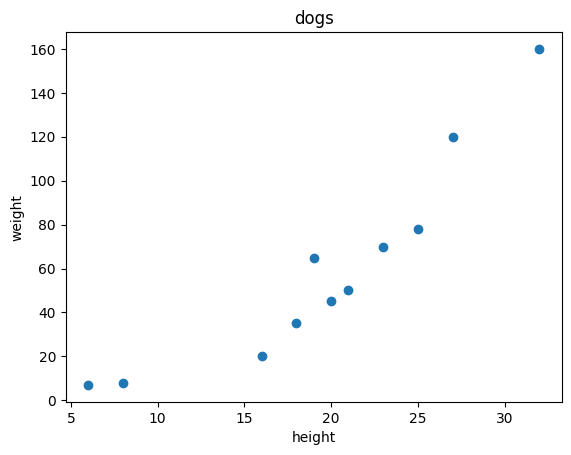

In [3]:
plt.scatter(dogs['height'], dogs['weight'])
plt.xlabel('height')
plt.ylabel('weight')
plt.title('dogs')
plt.show()

In [6]:
feature_names = dogs.columns[1:]
feature_names

Index(['height', 'weight'], dtype='object')

In [11]:
X = dogs[feature_names]
X

,height,weight
0,20,45
1,16,20
2,18,35
3,27,120
4,8,8
5,25,78
6,23,70
7,32,160
8,21,50
9,19,65


In [12]:
X.describe()

,height,weight
count,11.000000,11.000000
mean,19.545455,59.818182
std,7.659812,47.023012
min,6.000000,7.000000
25%,17.000000,27.500000
50%,20.000000,50.000000
75%,24.000000,74.000000
max,32.000000,160.000000


In [9]:
# k-means algoritam 
# neophodno izvrsiti normalizaciju jer koristimo euklidsko rastojanje

from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = feature_names)
X

,height,weight
0,0.538462,0.248366
1,0.384615,0.084967
2,0.461538,0.183007
3,0.807692,0.738562
4,0.076923,0.006536
5,0.730769,0.464052
6,0.653846,0.411765
7,1.000000,1.000000
8,0.576923,0.281046
9,0.500000,0.379085


In [14]:
X.describe()

,height,weight
count,11.000000,11.000000
mean,0.520979,0.345217
std,0.294608,0.307340
min,0.000000,0.000000
25%,0.423077,0.133987
50%,0.538462,0.281046
75%,0.692308,0.437908
max,1.000000,1.000000


In [15]:
from sklearn.cluster import KMeans

In [16]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [18]:
X[kmeans.labels_ == 0]

,height,weight
0,0.538462,0.248366
1,0.384615,0.084967
2,0.461538,0.183007
4,0.076923,0.006536
8,0.576923,0.281046
9,0.500000,0.379085
10,0.000000,0.000000


In [19]:
X[kmeans.labels_ == 1]

,height,weight
3,0.807692,0.738562
5,0.730769,0.464052
6,0.653846,0.411765
7,1.000000,1.000000


In [22]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns = feature_names)
centers

,height,weight
0,0.362637,0.169001
1,0.798077,0.653595


In [24]:
kmeans.inertia_

0.732128510026434

In [25]:
import numpy as np

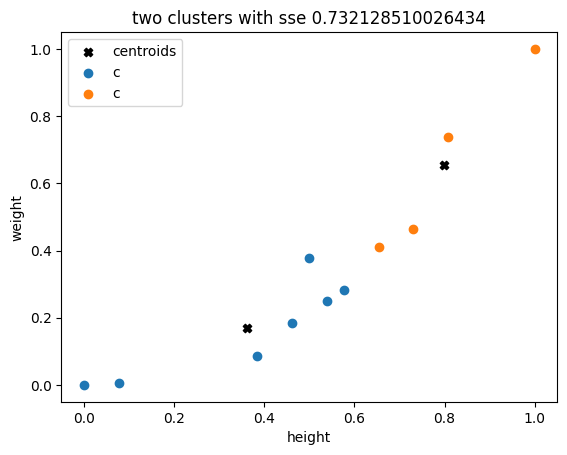

In [28]:
plt.scatter(centers['height'], centers['weight'], marker = 'X', label = 'centroids', color = 'black')

for c in np.unique(kmeans.labels_):
    elems = X[kmeans.labels_ == c]
    plt.scatter(elems['height'], elems['weight'], label = 'c')


plt.xlabel('height')
plt.ylabel('weight')
plt.title(f'two clusters with sse {kmeans.inertia_}')
plt.legend()
plt.show()

In [29]:
from sklearn.metrics import silhouette_samples

In [30]:
sv = silhouette_samples(X, kmeans.labels_)
sv

array([0.43838016, 0.60941263, 0.57018981, 0.55642193, 0.57654584,
       0.31689847, 0.02088641, 0.49092545, 0.30420853, 0.21612362,
       0.54509422])

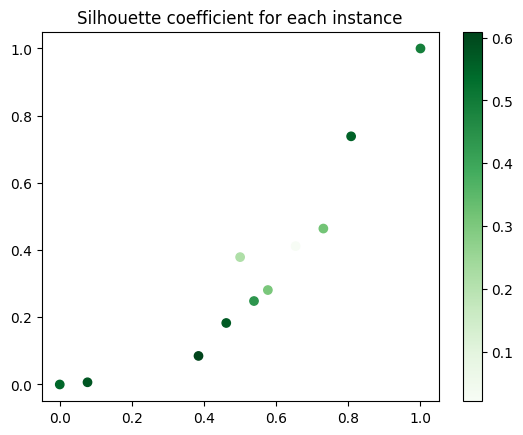

In [32]:
plt.scatter(X['height'], X['weight'], c = sv, cmap = "Greens")
plt.colorbar()
plt.title("Silhouette coefficient for each instance")
plt.show()

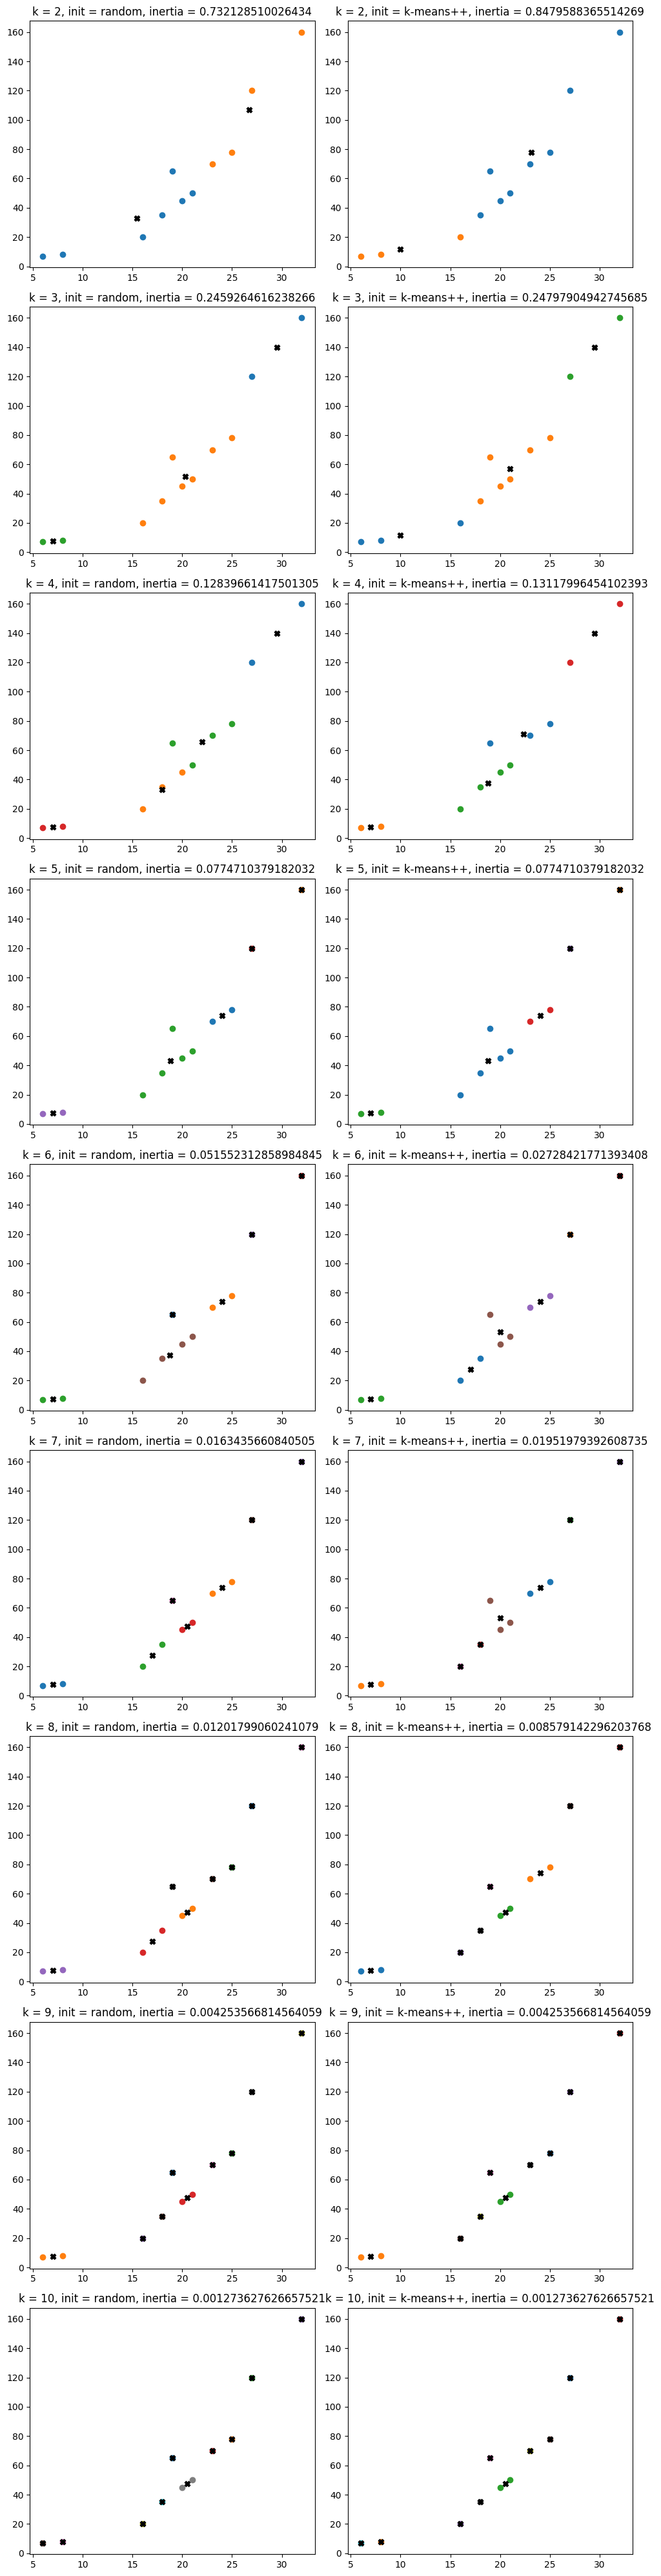

In [48]:
ks = range(2, X.shape[0])
inits = ['random', 'k-means++']
fig = plt.figure(figsize = (10, 40))

id = 1
inertia = []
silhouette = []

for k in ks:
    for init in inits:
        kmeans = KMeans(n_clusters = k, init = init)
        kmeans.fit(X)
        
        if init == 'k-means++':
            inertia.append(kmeans.inertia_)
            silhouette.append(silhouette_samples(X, kmeans.labels_))

        fig.add_subplot(len(ks), len(inits), id)
        id += 1

        for label in range(k):
            cluster = dogs[label == kmeans.labels_]
            plt.scatter(cluster['height'], cluster['weight'])

        centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns = feature_names)
        plt.scatter(centroids['height'], centroids['weight'], color = 'black', marker = 'X')

        plt.title(f'k = {k}, init = {init}, inertia = {kmeans.inertia_}')

plt.tight_layout()


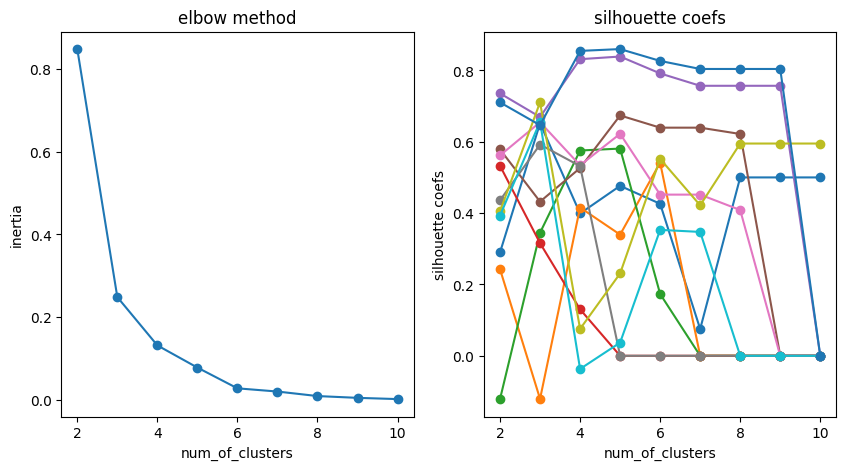

In [49]:
fig = plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.plot(ks, inertia, marker = 'o')
plt.ylabel('inertia')
plt.xlabel('num_of_clusters')
plt.title('elbow method')

plt.subplot(1, 2, 2)
plt.plot(ks, silhouette, marker = 'o')
plt.ylabel('silhouette coefs')
plt.xlabel('num_of_clusters')
plt.title('silhouette coefs')

plt.show()